# Total Production Units for Self-Consumption

### Master in Data Science and Engineering - FEUP

#### Group 4
202107955 - Beatriz Iara Nunes Silva
\
202206252 - Inês Clotilde da Costa Neves
\
202502527 - Kirill Savin
\
202502528 - Mariana Rocha Cristino
\
202202895 - Patrícia Crespo da Silva

<div id="top"></div>

# Table of Content

<ol>
    <li><h4><a href="#introduction">Introduction</a></h4></li>
    <li><h4><a href="#research">Research Questions</a></h4></li>
    <li><h4><a href="#data">Data</a></h4></li>
    <li><h4><a href="#inference">Inferences</a></h4></li>
        <h5>4.1 <a href="#rq1">Research Question 1</a></h5>
        <h5>4.2 <a href="#rq2">Research Question 2</a></h5>
        <h5>4.3 <a href="#rq3">Research Question 3</a></h5>
    <li><h4><a href="#results">Results and Discussion</a></h4></li>
    <li><h4><a href="#conclusion">Conclusion</a></h4></li>    

</ol>

# Introduction

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Research Questions

**General Research Question:**
* RQ: Compare how seasonal (winter vs summer), regional, and technical factors shape self-consumption energy production patterns in Portugal between 2023 and 2024.

**Specifics Research Questions:**
* RQ1: Compare the average installed capacity per UPAC across different power levels and districts in 2023 and 2024. - Kirill
* RQ2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns. - Iara and Mariana
* RQ3: Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024. - Inês and Patrícia

Districts for SRQ: Aveiro, Évora, Vila Real and Faro

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Data

## Libraries

In [24]:
import geopandas as gpd
import json
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels

## Prepare Data

Reading the dataset:

In [25]:
#df_origin = pd.read_csv('../Data/UPAC_Total_Production.csv', sep=';', decimal='.')
df_origin = pd.read_csv('UPAC_Total_Production.csv', sep=';', decimal='.')

df_origin.head(10)

,Quarter,District,Municipality,Parish,Zip Code,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),DistrictCode,Municipality Code,DistrictMunicipalityParishCode,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,3150,Solar,BTN,"]0, 4]",2,3.000000,6,604,060407,9537.000000,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,3150,Solar,BTN,"]0, 4]",2,4.320000,6,604,060410,9537.000000,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,3150,Não Atribuído,BTN,"]0, 4]",1,1.050000,6,604,060411,9537.000000,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,3150,Solar,BTN,"]0, 4]",17,28.140000,6,604,060413,9537.000000,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,3090,Não Atribuído,BTN,"]0, 4]",2,3.280000,6,605,060514,50436.000000,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,3080,Não Atribuído,BTN,"]0, 4]",1,2.000000,6,605,060518,50436.000000,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Não Atribuído,BTN,"]0, 4]",9,13.590000,6,605,060520,50436.000000,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Solar,BTN,"]0, 4]",128,202.510000,6,605,060520,50436.000000,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,3090,Não Atribuído,BTN,"]0, 4]",3,4.960000,6,605,060521,50436.000000,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,3090,Solar,BTN,"]0, 4]",93,112.510000,6,605,060522,50436.000000,0.001844,0.002231


Rename the last two columns to English

In [26]:
df_origin = df_origin.rename(columns={
    "relacao_instalacoes_por_cpe": "installations_per_cpe_ratio",
    "relacao_potencia_por_cpe": "power_per_cpe_ratio"
})
print(df_origin.columns)

Index(['Quarter', 'District', 'Municipality', 'Parish', 'Zip Code',
       'Technology Type', 'Voltage level', 'Installed power range (kW)',
       'Number of installations', 'Total installed power (kW)', 'DistrictCode',
       'Municipality Code', 'DistrictMunicipalityParishCode', 'CPEs (#)',
       'installations_per_cpe_ratio', 'power_per_cpe_ratio'],
      dtype='object')


Dataset info

In [27]:
print("\nDataset info:")
print(df_origin.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121294 entries, 0 to 121293
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Quarter                         121294 non-null  object 
 1   District                        121294 non-null  object 
 2   Municipality                    121294 non-null  object 
 3   Parish                          121294 non-null  object 
 4   Zip Code                        121294 non-null  int64  
 5   Technology Type                 121283 non-null  object 
 6   Voltage level                   121292 non-null  object 
 7   Installed power range (kW)      121294 non-null  object 
 8   Number of installations         121294 non-null  int64  
 9   Total installed power (kW)      121294 non-null  float64
 10  DistrictCode                    121294 non-null  int64  
 11  Municipality Code               121294 non-null  int64  
 12  D

Non-Numeric Columns

In [28]:
non_numeric = df_origin.select_dtypes(exclude=['number'])


for col in non_numeric.columns:
    unique_vals = df_origin[col].unique().tolist()
    print(f"Column: {col} — {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 40)

Column: Quarter — 11 unique values
['2023T1', '2023T2', '2024T2', '2024T3', '2024T4', '2023T3', '2023T4', '2024T1', '2025T1', '2025T2', '2022T4']
----------------------------------------
Column: District — 18 unique values
['Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco']
----------------------------------------
Column: Municipality — 278 unique values
['Condeixa-a-Nova', 'Figueira da Foz', 'Lousã', 'Mira', 'Miranda do Corvo', 'Montemor-o-Velho', 'Oliveira do Hospital', 'Pampilhosa da Serra', 'Penacova', 'Penela', 'Soure', 'Tábua', 'Vila Nova de Poiares', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz', 'Évora', 'Montemor-o-Novo', 'Mora', 'Portel', 'Redondo', 'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo', 'Vila Viçosa', 'Albufeira', 'Alcoutim', 'Aljezur', 'Castro Marim', 'Faro', 'Lagoa', 'Lagos', 'Loulé', 'Monchique', 'Ol

Translation Dictionary Technology Type

In [29]:
tech_type_translation = {
    'Solar': 'Solar',
    'Não Atribuído': 'Not Assigned',
    'Eólica': 'Wind',
    'Biogás': 'Biogas',
    'Cogeração não renovável': 'Non-renewable Cogeneration',
    'Hídrica': 'Hydro',
    'Biomassa': 'Biomass',
    'Fotovoltaica': 'Photovoltaic'
}

df_origin['Technology Type'] = df_origin['Technology Type'].map(tech_type_translation).fillna(df_origin['Technology Type'])
print(df_origin['Technology Type'].unique())


['Solar' 'Not Assigned' 'Wind' 'Biogas' 'Non-renewable Cogeneration'
 'Hydro' 'Biomass' 'Photovoltaic' nan]


### Data Selection

Removing unnecessary columns

In [30]:
cols_to_keep = [
    "Quarter",
    "District",
    "Municipality",
    "Parish",
    "Technology Type",
    "Voltage level",
    "Installed power range (kW)",
    "Number of installations",
    "Total installed power (kW)",
    "CPEs (#)",
    "installations_per_cpe_ratio",
    "power_per_cpe_ratio"
]

df_filtered = df_origin[cols_to_keep]
df_filtered.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.000000,9537.000000,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.320000,9537.000000,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.050000,9537.000000,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.140000,9537.000000,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.280000,50436.000000,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.000000,50436.000000,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.590000,50436.000000,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.510000,50436.000000,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.960000,50436.000000,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.510000,50436.000000,0.001844,0.002231


Selecting years of interest

In [31]:
df_filtered = df_filtered[df_filtered['Quarter'].str.startswith(('2023', '2024'))].copy()
print(df_filtered['Quarter'].value_counts())

Quarter
2023T3    13295
2024T4    11737
2024T3    11399
2024T2    11086
2024T1    10839
2023T1    10481
2023T4    10407
2023T2     9301
Name: count, dtype: int64


### Data Inspection and Cleaning

Checking for missing values

In [32]:
missing_df = pd.DataFrame({
    'Missing Values': df_filtered.isnull().sum(),
    'Percentage': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})
print("\nMissing Values summary:")
display(missing_df[missing_df['Missing Values'] > 0])


Missing Values summary:


,Missing Values,Percentage
Voltage level,2,0.002259


In [33]:
print("Before dropping NA:", df_filtered.shape)
df_filtered = df_filtered.dropna()
print("After dropping NA:", df_filtered.shape)

Before dropping NA: (88545, 12)
After dropping NA: (88543, 12)


Check for duplicate rows

In [34]:
duplicates = df_filtered[df_filtered.duplicated()]
print(duplicates)
print("Number of duplicates:", df_filtered.duplicated().sum())

       Quarter  District         Municipality  \
3666    2024T2     Braga             Barcelos   
9221    2024T4    Lisboa                Mafra   
11106   2023T4      Faro                Loulé   
14824   2024T2      Faro                Loulé   
43536   2024T3  Santarém  Salvaterra de Magos   
44840   2023T2     Évora                Évora   
45738   2023T2     Braga            Guimarães   
54983   2024T1      Faro                Loulé   
56600   2024T1    Lisboa               Lisboa   
57315   2023T3     Porto           Matosinhos   
59164   2023T4     Évora                Évora   
62981   2024T2    Lisboa               Loures   
67272   2024T3    Lisboa               Lisboa   
68366   2024T3    Lisboa              Amadora   
87473   2023T4     Braga             Barcelos   
94814   2024T1    Lisboa              Amadora   
96966   2024T2  Santarém  Salvaterra de Magos   
97491   2024T2    Lisboa               Lisboa   
97935   2023T4    Lisboa              Amadora   
99945   2024T1    Li

In [35]:
print("Before dropping duplicates:", df_filtered.shape)
df_filtered = df_filtered.drop_duplicates()
print("After dropping duplicates:", df_filtered.shape)

Before dropping duplicates: (88543, 12)
After dropping duplicates: (88511, 12)


### Derived Metrics

**Percentage of Installations by Voltage Level per District**

According to E-redes ([Manual de Ligações à Rede](https://provedordocliente.e-redes.pt/Files/PDF/Manual-de-Ligacoes-a-Rede.pdf)):

*High Voltage (AT)*
- Companies with capacities >10 MVA, supplied at 60 kV.
- Clear proxy for heavy industry or large commercial facilities.
- Districts with a higher proportion of AT installations → more industrialized.

*Medium Voltage (MT)*
- Companies with capacities >200 kVA, voltages of 10–30 kV.
- Also indicates industrial activity or large commercial companies.
- Complements AT; districts with a higher proportion of MT → more industrialized areas, but less intense than AT.

*Low Voltage Normal (BTN) and Low Voltage Special (BTE)*
- **BTN** → residences, small shops/offices.
- **BTE** → small/medium companies (>41.4 kVA).
- Districts dominated by BTN → mainly residential areas.
- BTE is mixed, can indicate areas with small industries or commerce, but less significant than MT/AT.


In [36]:
# Make a copy
df = df_filtered.copy()

# Group by Quarter, District, and Voltage level, summing the Number of installations
grouped = (
    df.groupby(['Quarter', 'District', 'Voltage level'], as_index=False)['Number of installations'].sum()
)

# Pivot table to have Voltage levels as columns
pivot = grouped.pivot_table(
    index=['Quarter', 'District'],
    columns='Voltage level',
    values='Number of installations',
    fill_value=0
).reset_index()

# Ensure all expected voltage columns exist
for col in ['AT', 'MT', 'BTN', 'BTE']:
    if col not in pivot.columns:
        pivot[col] = 0

# Calculate total installations per row
pivot['Total'] = pivot[['AT','MT','BTN','BTE']].sum(axis=1)

# Calculate percentage per voltage level
pivot["District_High_Voltage_AT(%)"] = pivot['AT'] / pivot['Total'] * 100
pivot["District_Medium_Voltage_MT(%)"] = pivot['MT'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTN(%)"] = pivot['BTN'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTE(%)"] = pivot['BTE'] / pivot['Total'] * 100

# Select only the relevant columns
df_result = pivot[['Quarter', 'District',
                   'District_High_Voltage_AT(%)',
                   'District_Medium_Voltage_MT(%)',
                   'District_Low_Voltage_BTN(%)',
                   'District_Low_Voltage_BTE(%)']]

df_result


Voltage level,Quarter,District,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Aveiro,0.052687,3.819810,94.362487,1.765016
1,2023T1,Beja,0.000000,3.415560,92.979127,3.605313
2,2023T1,Braga,0.022525,2.201825,96.564928,1.210722
3,2023T1,Bragança,0.000000,1.640241,95.899399,2.460361
4,2023T1,Castelo Branco,0.064767,2.428756,95.401554,2.104922
...,...,...,...,...,...,...
139,2024T4,Setúbal,0.027293,1.305495,97.643741,1.023472
140,2024T4,Viana do Castelo,0.014778,1.728979,97.103591,1.152653
141,2024T4,Vila Real,0.000000,1.651020,97.134995,1.213985
142,2024T4,Viseu,0.016521,2.602016,96.241533,1.139931


In [37]:
df_final = df_filtered.merge(df_result, on=['Quarter', 'District'], how='left')
df_final.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.000000,9537.000000,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.320000,9537.000000,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.050000,9537.000000,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.140000,9537.000000,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.280000,50436.000000,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.000000,50436.000000,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.590000,50436.000000,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.510000,50436.000000,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.960000,50436.000000,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.510000,50436.000000,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261


**Map Quarters to Seasons**

In [38]:
# Function to convert Quarter to Season
def quarter_to_season(quarter):
    if quarter.endswith('T1') or quarter.endswith('T4'):
        return 'Winter'
    elif quarter.endswith('T3') or quarter.endswith('T2'):
        return 'Summer'
    else:
        return 'Unknown'

# Apply the function to create a new Season column
df_final['Season'] = df_final['Quarter'].apply(quarter_to_season)

# Display first 10 rows
df_final.head(10)


,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.000000,9537.000000,0.000210,0.000315,0.041147,1.796736,96.872857,1.289261,Winter
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.320000,9537.000000,0.000210,0.000453,0.041147,1.796736,96.872857,1.289261,Winter
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.050000,9537.000000,0.000105,0.000110,0.041147,1.796736,96.872857,1.289261,Winter
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.140000,9537.000000,0.001783,0.002951,0.041147,1.796736,96.872857,1.289261,Winter
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.280000,50436.000000,0.000040,0.000065,0.041147,1.796736,96.872857,1.289261,Winter
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.000000,50436.000000,0.000020,0.000040,0.041147,1.796736,96.872857,1.289261,Winter
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.590000,50436.000000,0.000178,0.000269,0.041147,1.796736,96.872857,1.289261,Winter
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.510000,50436.000000,0.002538,0.004015,0.041147,1.796736,96.872857,1.289261,Winter
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.960000,50436.000000,0.000059,0.000098,0.041147,1.796736,96.872857,1.289261,Winter
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.510000,50436.000000,0.001844,0.002231,0.041147,1.796736,96.872857,1.289261,Winter


Check final data types

In [39]:
df_final.dtypes

Quarter                           object
District                          object
Municipality                      object
Parish                            object
Technology Type                   object
Voltage level                     object
Installed power range (kW)        object
Number of installations            int64
Total installed power (kW)       float64
CPEs (#)                         float64
installations_per_cpe_ratio      float64
power_per_cpe_ratio              float64
District_High_Voltage_AT(%)      float64
District_Medium_Voltage_MT(%)    float64
District_Low_Voltage_BTN(%)      float64
District_Low_Voltage_BTE(%)      float64
Season                            object
dtype: object

**Summary of numeric variables**

In [40]:
df = df_final.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of installations,88511.000000,17.484414,58.117527,1.000000,1.000000,2.000000,8.000000,2118.000000
Total installed power (kW),88511.000000,122.137273,383.756280,0.000000,14.050000,30.000000,82.795000,19600.000000
CPEs (#),88511.000000,45229.553615,60332.903272,1260.000000,10911.000000,27430.000000,57414.000000,399456.000000
installations_per_cpe_ratio,88511.000000,0.000824,0.002353,0.000003,0.000036,0.000117,0.000492,0.052016
power_per_cpe_ratio,88511.000000,0.005886,0.031139,0.000000,0.000470,0.001444,0.004071,3.203661
District_High_Voltage_AT(%),88511.000000,0.016606,0.017188,0.000000,0.003992,0.012109,0.022525,0.075075
District_Medium_Voltage_MT(%),88511.000000,2.501376,0.792136,0.893764,1.974736,2.461085,2.685493,4.699666
District_Low_Voltage_BTN(%),88511.000000,95.675196,1.288820,89.988877,95.281230,95.899399,96.380047,98.293723
District_Low_Voltage_BTE(%),88511.000000,1.806821,0.719718,0.805742,1.235248,1.765016,2.093719,5.283648


**Number of installations**

Average: 17.47 → on average, each record has ~18 installations.

Standard deviation: 58.11 → high, indicating great variability between municipalities/records.

Distribution: median = 2, 25% = 1, 75% = 8 → asymmetric: most records have few installations, but some have extremely high values (max = 2118), possibly outliers or large production centers.

**Total Installed Power UPAC (kW)**

Average: 122.10 kW → relatively low considering that there are large outliers.

Standard deviation: 383.69 kW → very high, again showing strong variability.

Quartiles: 25% = 14.04 kW, median = 30.00 kW, 75% = 82.79 kW

Maximum: 19,600 kW → indicates the existence of some very large installations.

Conclusion: most units are small, but there are large installations that greatly increase the average.

<div id="inference"></div>
<strong><a href="#top">Back to top</a></strong>

# Inferences

<div id="rq1"></div>

# Research Question 1

to do:

complete


<div id="rq2"></div>

# Research Question 2

to do: 

complete

<div id="rq3"></div>

# Research Question 3

#### Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024.

#### **Population Information**

The population considered in this analysis consists of all self-consumption electricity generation installations registered in Portugal during the years 2023 and 2024. Each record in the population includes the total installed capacity (in kilowatts), the corresponding power scale range (categorical variable indicating system size), the season of observation (winter or summer), and the district where the installation is located.


#### **Sample Information**

A subset of four districts — **Aveiro**, **Évora**, **Faro** and **Vila Real** — was selected to represent diverse geographic and climatic regions of Portugal, ensuring coverage of both coastal and inland areas.
Data were included only when complete information was available for **power scale**, **season**, and **total installed capacity** for both years.

#### **Variable Definitions:**

#### **Hypothesis:**

* Effect of Power Scale

H0: média entre scales é igual; H1: pelo menos um scale differs

* Effect of Season

H0: média entre seasons é igual; H1: média entre seasons é diferente

* Effect of District

H0: média entre distritos igual; H1: pelo menos um district differs

* Effect of Year

H0: média entre years é igual; H1: média entre years differs

* Intersaction effect (power scale x season)

* Interaction Effect (power scale x district)

* Interaction Effect (season x district)

* Interaction Effect (power scale x season x district)

**Variable Definitions:**

- $\mu_{Y}$: mean log total power for each Year.

- $\mu_{D}$: mean log total power for each District.

- $\mu_{S}$: mean log total power for each Season.

- $\mu_{P}$: mean log total power for each Installed power range (kW).



**Hypotheses**

For this analysis, the following null and alternative hypotheses were defined to assess differences in log total power across Years, Districts, Seasons, Installed power ranges, and their interaction.

- *Effect of Year (2023 vs 2024):*

$$
H_0^{\text{Year}}: \mu_{2023} = \mu_{2024} \\
H_1^{\text{Year}}: \mu_{2023} \neq \mu_{2024}
$$

- *Effect of District (Aveiro, Évora, Vila Real, Faro):*

$$
H_0^{\text{District}}: \mu_{\text{Aveiro}} = \mu_{\text{Évora}} = \mu_{\text{Vila Real}} = \mu_{\text{Faro}} \\
H_1^{\text{District}}: \text{At least one district mean differs}
$$

- *Effect of Season (Winter vs Summer):*

$$
H_0^{\text{Season}}: \mu_{\text{Winter}} = \mu_{\text{Summer}} \\
H_1^{\text{Season}}: \mu_{\text{Winter}} \neq \mu_{\text{Summer}}
$$

- *Effect of Installed power range (kW):*

$$
H_0^{\text{Power}}: \mu_{(0,4]} = \mu_{(4,20.7]} = \mu_{(20.7,30]} = \mu_{(30, 1000]} = \mu_{>1000} \\
H_1^{\text{Power}}: \text{At least one power range mean differs}
$$

- *Interaction Effects:*

  - Year × District:
  $$
  H_0^{\text{Year × District}}: \text{No interaction between Year and District} \\
  H_1^{\text{Year × District}}: \text{Interaction exists}
  $$

  - Year × Season:
  $$
  H_0^{\text{Year × Season}}: \text{No interaction between Year and Season} \\
  H_1^{\text{Year × Season}}: \text{Interaction exists}
  $$

  - District × Season:
  $$
  H_0^{\text{District × Season}}: \text{No interaction between District and Season} \\
  H_1^{\text{District × Season}}: \text{Interaction exists}
  $$

  - Year × Installed power range:
  $$
  H_0^{\text{Year × Power}}: \text{No interaction between Year and Power range} \\
  H_1^{\text{Year × Power}}: \text{Interaction exists}
  $$

  - District × Installed power range:
  $$
  H_0^{\text{District × Power}}: \text{No interaction between District and Power range} \\
  H_1^{\text{District × Power}}: \text{Interaction exists}
  $$

  - Season × Installed power range:
  $$
  H_0^{\text{Season × Power}}: \text{No interaction between Season and Power range} \\
  H_1^{\text{Season × Power}}: \text{Interaction exists}
  $$

- *Three-way Interaction Effects:*

  - Year × District × Season:
  $$
  H_0^{\text{3-way}}: \text{No three-way interaction} \\
  H_1^{\text{3-way}}: \text{Three-way interaction exists}
  $$

  - Year × District × Installed power range:
  $$
  H_0^{\text{3-way}}: \text{No three-way interaction} \\
  H_1^{\text{3-way}}: \text{Three-way interaction exists}
  $$

  - Year × Season × Installed power range:
  $$
  H_0^{\text{3-way}}: \text{No three-way interaction} \\
  H_1^{\text{3-way}}: \text{Three-way interaction exists}
  $$

  - District × Season × Installed power range:
  $$
  H_0^{\text{3-way}}: \text{No three-way interaction} \\
  H_1^{\text{3-way}}: \text{Three-way interaction exists}
  $$

- *Four-way Interaction Effect:*

$$
H_0^{\text{4-way}}: \text{No four-way interaction among Year, District, Season, and Power range} \\
H_1^{\text{4-way}}: \text{Four-way interaction exists}
$$

In [41]:
# --- Preparar dados com variável Year ---

# 1️⃣ Selecionar colunas relevantes (sem Quarter)
cols = ['District', 'Installed power range (kW)', 'Total installed power (kW)', 'Season', 'Quarter']
df = df[cols].dropna(subset=['District', 'Installed power range (kW)', 'Total installed power (kW)', 'Season'])

# 2️⃣ Extrair o ano da coluna 'Quarter'
# Supondo que o formato é algo como "2023Q1", "2024Q2", etc.
df['Year'] = df['Quarter'].astype(str).str.extract(r'(20\d{2})').astype(int)

# 3️⃣ Filtrar distritos de interesse
df = df[df['District'].isin(['Aveiro', 'Évora', 'Faro', 'Vila Real'])]

# 4️⃣ Normalizar valores da Season
df['Season'] = (
    df['Season']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'winter': 'winter', 'verão': 'summer', 'summer': 'summer', 'inverno': 'winter'})
    .fillna(df['Season'])
)

# 5️⃣ Excluir escalão >1000 kW e padronizar etiquetas
valid_scales = [']0, 4]', ']4, 20.7]', ']20.7, 30]', ']30, 1000]']
df['Installed power range (kW)'] = (
    df['Installed power range (kW)']
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
)
df = df[df['Installed power range (kW)'].isin(valid_scales)]

# 6️⃣ Definir tipos categóricos ordenados
df['Installed power range (kW)'] = pd.Categorical(df['Installed power range (kW)'], categories=valid_scales, ordered=True)
df['District'] = pd.Categorical(df['District'], categories=['Aveiro', 'Évora', 'Faro', 'Vila Real'], ordered=False)
df['Season'] = pd.Categorical(df['Season'], categories=['winter', 'summer'], ordered=False)
df['Year'] = pd.Categorical(df['Year'], categories=sorted(df['Year'].unique()), ordered=True)

# 7️⃣ Conferir número de observações por grupo
counts = (
    df.groupby(['Year', 'District', 'Installed power range (kW)', 'Season'], dropna=False)
      .size()
      .reset_index(name='n')
      .sort_values(['Year', 'District', 'Installed power range (kW)', 'Season'])
)
print(counts.head(20))
print("\nTotal rows after filters:", len(df))


    Year District Installed power range (kW)  Season    n
0   2023   Aveiro                     ]0, 4]  winter  485
1   2023   Aveiro                     ]0, 4]  summer  512
2   2023   Aveiro                  ]4, 20.7]  winter  456
3   2023   Aveiro                  ]4, 20.7]  summer  490
4   2023   Aveiro                 ]20.7, 30]  winter  253
5   2023   Aveiro                 ]20.7, 30]  summer  260
6   2023   Aveiro                 ]30, 1000]  winter  341
7   2023   Aveiro                 ]30, 1000]  summer  398
8   2023    Évora                     ]0, 4]  winter  199
9   2023    Évora                     ]0, 4]  summer  216
10  2023    Évora                  ]4, 20.7]  winter  162
11  2023    Évora                  ]4, 20.7]  summer  175
12  2023    Évora                 ]20.7, 30]  winter   83
13  2023    Évora                 ]20.7, 30]  summer   91
14  2023    Évora                 ]30, 1000]  winter   97
15  2023    Évora                 ]30, 1000]  summer  115
16  2023     F

C:\Users\InesNeves\AppData\Local\Temp\ipykernel_30128\3071137980.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Year', 'District', 'Installed power range (kW)', 'Season'], dropna=False)


#### **Statistical Test and Assumptions - ADAPT**

To test these hypotheses, a four-way ANOVA was applied with factors Power Scale (Installed Power Range), Season (Winter vs. Summer), District, and Year. This factorial model evaluates both the main effects and interactions between structural (scale), temporal (year), seasonal, and regional factors. Before conducting the analysis, the following assumptions were verified:

* Samples Drawn from the Population

A subset of four districts — Aveiro, Évora, Faro, and Vila Real — was selected to represent diverse geographic and climatic regions of Portugal, ensuring coverage of both coastal and inland areas. Data were included only when complete information was available for power scale, season, and total installed capacity for both years (2023–2024). This approach ensures representativeness of the population of UPAC self-consumption installations across regional and climatic contexts.

* Sufficiently Large Sample Size

For each combination of District, Power Scale, Season, and Year, stratified random samples were drawn, representing up to 10% of each subgroup. These sample sizes are large enough for the Central Limit Theorem (CLT) to apply, ensuring that the distribution of sample means approximates normality even if the population data are not perfectly normal.

* Independence of Observations

Each UPAC installation represents an independent observation — a distinct self-consumption unit with its own installed capacity. Therefore, observations are independent both within and across groups (District × Power Scale × Season × Year).

* Normality of Residuals

The ANOVA assumes that residuals of installed capacity are approximately normally distributed within each group. The use of the log₁₀-transformed installed capacity (log₁₀_power) and stratified sampling support this assumption by reducing skewness and stabilizing variances.

* Homogeneity of Variances

????????????????? levene test ??????????????????

C:\Users\InesNeves\AppData\Local\Temp\ipykernel_30128\3671688133.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


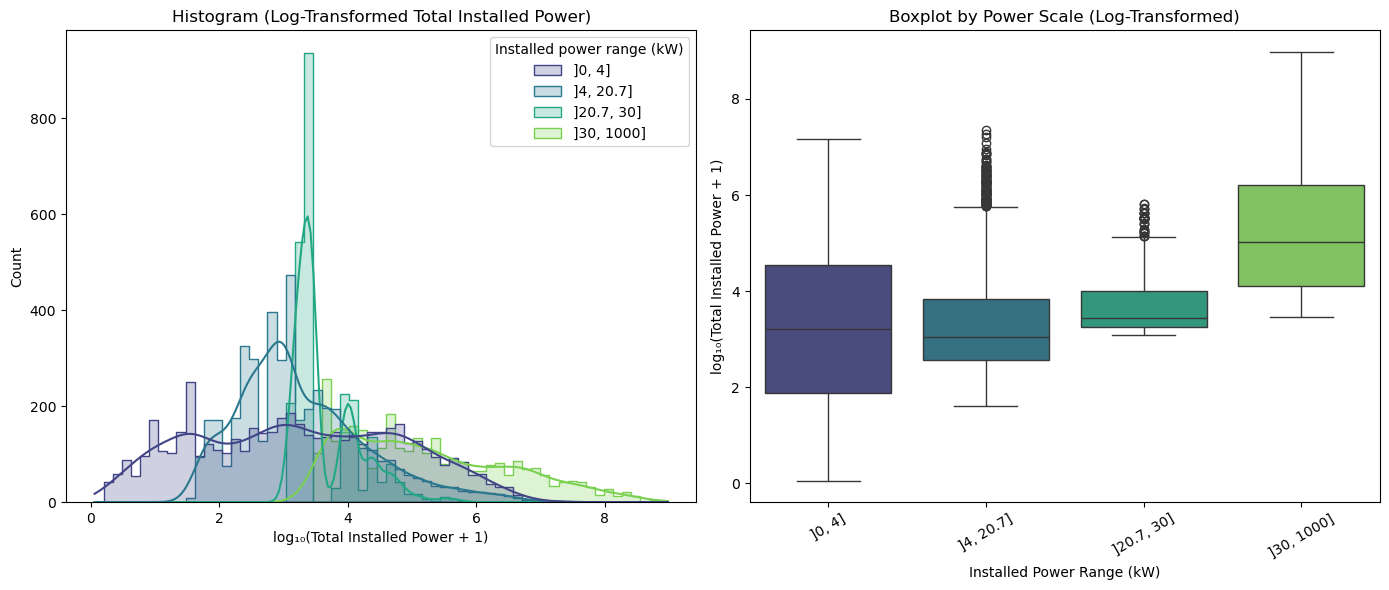

In [42]:
# Criar nova coluna log-transformada
# np.log1p(x) aplica log(1+x), evitando problemas com valores 0
df['log_total_power'] = np.log1p(df['Total installed power (kW)'])

# 2️⃣ Criar figuras lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# --- Plot 1: Histograma da potência total transformada ---
sns.histplot(
    data=df,
    x='log_total_power',
    hue='Installed power range (kW)',   # ajusta conforme o nome exato da tua coluna
    kde=True,
    element='step',
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Histogram (Log-Transformed Total Installed Power)', fontsize=12)
axes[0].set_xlabel('log₁₀(Total Installed Power + 1)', fontsize=10)
axes[0].set_ylabel('Count')

# --- Plot 2: Boxplot por escala de potência ---
sns.boxplot(
    data=df,
    x='Installed power range (kW)',
    y='log_total_power',
    ax=axes[1],
    palette='viridis'
)
axes[1].set_title('Boxplot by Power Scale (Log-Transformed)', fontsize=12)
axes[1].set_xlabel('Installed Power Range (kW)', fontsize=10)
axes[1].set_ylabel('log₁₀(Total Installed Power + 1)', fontsize=10)
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


- **Normality and Homogeity**

Visual inspection of the histogram and boxplot of the log-transformed data revealed that the distributions became approximately symmetric across all power scale groups. This transformation reduced the influence of extreme values and stabilized the variance, allowing the assumptions of ANOVA to be reasonably met. 
\
Furthermore, the boxplot shows that the spread of the boxes is fairly similar across groups, reinforcing the conclusion that the variances are approximately homogeneous. Consequently, it is appropriate to proceed with a two-way ANOVA on the log-transformed data to assess the effects of power scale and season.

* Levene test for equal variances?

In [43]:
from scipy.stats import levene
import pandas as pd

print("=== Levene’s Test for Homogeneity of Variances ===\n")

#  Variável dependente
dependent_var = 'log_total_power'

#  Lista de variáveis independentes a testar
factors = ['Installed power range (kW)', 'Season', 'District', 'Year']

#  Guardar resultados
results = []

#  Loop: aplicar Levene test a cada variável independente
for factor in factors:
    groups = [g[dependent_var].dropna() for _, g in df.groupby(factor, observed=True)]
    
    # Apenas se houver pelo menos dois grupos
    if len(groups) > 1:
        stat, p = levene(*groups, center='median')
        results.append({
            'Factor': factor,
            'Levene Statistic': stat,
            'p-value': p,
            'Equal Variances?': 'Yes' if p >= 0.05 else 'No (heteroscedastic)'
        })

#  Converter em tabela
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False, justify='left', float_format='{:,.4f}'.format))

#  Interpretação geral
print("\nInterpretation:")
print("p ≥ 0.05 → Variances are homogeneous (OK for standard ANOVA).")
print("p < 0.05 → Variances differ significantly (heteroscedasticity detected → use Robust ANOVA HC3).")


=== Levene’s Test for Homogeneity of Variances ===

Factor                      Levene Statistic  p-value Equal Variances?    
Installed power range (kW) 1,187.2559        0.0000   No (heteroscedastic)
                    Season     0.7675        0.3810                    Yes
                  District   107.0998        0.0000   No (heteroscedastic)
                      Year     3.2999        0.0693                    Yes

Interpretation:
p ≥ 0.05 → Variances are homogeneous (OK for standard ANOVA).
p < 0.05 → Variances differ significantly (heteroscedasticity detected → use Robust ANOVA HC3).


Levene’s test indicated significant heterogeneity of variances across groups (p < 0.001), suggesting that the assumption of homoscedasticity required for a standard ANOVA was violated. Therefore, a four-way ANOVA with heteroskedasticity-consistent standard errors (HC3) was applied. The HC3 estimator adjusts the covariance matrix of the model to account for unequal variances among groups, providing robust F- and p-values even under heteroscedastic conditions. In practice, this approach is equivalent to a Welch-type correction extended to multifactor ANOVA designs, ensuring that the results remain reliable despite variance inequality.

In [44]:
# === Generate stratified random samples (<10%) ===

print(f"Population size: {df.shape[0]}")

# Backup of the filtered dataset
df_rs = df.copy() # to use later on Random Sampling

# Define grouping variables for stratified sampling
group_cols = ['District', 'Installed power range (kW)', 'Season', 'Year']

# Compute group sizes
group_sizes = df.groupby(group_cols, observed=True).size()
print(f"Number of groups: {len(group_sizes)}")

# --- Define sample size logic ---
# Minimum group size across strata
min_group_size = group_sizes.min()
# Maximum allowed sample size (10% of population * 0.9 margin)
max_sample_size = round(df.shape[0] * 0.1 * 0.9)

# Choose the sample size per stratum (balance safety + representativeness)
sample_size = min(max_sample_size, min_group_size)

print(f"Sample size per group: {sample_size} (min group = {min_group_size}, 10% cap = {max_sample_size})")

# --- Stratified random sampling ---
df_sample = (
    df.groupby(group_cols, observed=True, group_keys=False)
      .apply(lambda g: g.sample(n=min(len(g), sample_size), random_state=42))
      .reset_index(drop=True)
)

# --- Show summary ---
print(f"\nNew total sample size: {len(df_sample)} rows")
group_counts = df_sample.groupby(group_cols, observed=True).size()
print("\nSample size per group:\n")
print(group_counts)

# Display sample for inspection
display(df_sample)


Population size: 15592
Number of groups: 64
Sample size per group: 63 (min group = 63, 10% cap = 1403)

New total sample size: 4032 rows

Sample size per group:

District   Installed power range (kW)  Season  Year
Aveiro     ]0, 4]                      winter  2023    63
                                               2024    63
                                       summer  2023    63
                                               2024    63
           ]4, 20.7]                   winter  2023    63
                                                       ..
Vila Real  ]20.7, 30]                  summer  2024    63
           ]30, 1000]                  winter  2023    63
                                               2024    63
                                       summer  2023    63
                                               2024    63
Length: 64, dtype: int64


C:\Users\InesNeves\AppData\Local\Temp\ipykernel_30128\4166036047.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=min(len(g), sample_size), random_state=42))


,District,Installed power range (kW),Total installed power (kW),Season,Quarter,Year,log_total_power
0,Aveiro,"]0, 4]",155.620000,winter,2023T1,2023,5.053822
1,Aveiro,"]0, 4]",26.080000,winter,2023T1,2023,3.298795
2,Aveiro,"]0, 4]",72.720000,winter,2023T1,2023,4.300274
3,Aveiro,"]0, 4]",3.860000,winter,2023T1,2023,1.581038
4,Aveiro,"]0, 4]",273.660000,winter,2023T1,2023,5.615534
...,...,...,...,...,...,...,...
4027,Vila Real,"]30, 1000]",120.000000,summer,2024T2,2024,4.795791
4028,Vila Real,"]30, 1000]",320.280000,summer,2024T2,2024,5.772313
4029,Vila Real,"]30, 1000]",40.000000,summer,2024T3,2024,3.713572
4030,Vila Real,"]30, 1000]",43.520000,summer,2024T2,2024,3.795939


HISTOGRAM BY SCALE, SEASON, DISTRICT, YEAR ??????????????

# **ANOVA Results and Interpretation**

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# --- Four-way robust ANOVA (HC3) including Year ---
model = ols(
    'log_total_power ~ C(Year) * C(District) * C(Season) * C(Q("Installed power range (kW)"))',
    data=df_sample
).fit(cov_type='HC3')

anova_table_robust = sm.stats.anova_lm(model, typ=2)

# Format floating numbers
pd.reset_option('display.float_format')
pd.options.display.float_format = '{:.6f}'.format

print("\n=== Four-way Robust ANOVA (Year × District × Season × Scale) results ===\n")
display(anova_table_robust)

# --- Optional: interpret p-values inline ---
print("\n--- Summary of Effects ---")
for factor, pval in anova_table_robust["PR(>F)"].items():
    if pval < 0.05:
        print(f"✅ {factor}: Significant (p = {pval:.3e})")
    else:
        print(f"❌ {factor}: Not significant (p = {pval:.3e})")



=== Four-way Robust ANOVA (Year × District × Season × Scale) results ===



,sum_sq,df,F,PR(>F)
C(Year),81.195230,1.000000,68.882181,0.000000
C(District),318.734485,3.000000,90.133071,0.000000
C(Season),0.705353,1.000000,0.598388,0.439240
"C(Q(""Installed power range (kW)""))",2620.442437,3.000000,741.019676,0.000000
C(Year):C(District),6.323682,3.000000,1.788237,0.147144
C(Year):C(Season),2.983129,1.000000,2.530745,0.111727
C(District):C(Season),4.778730,3.000000,1.351349,0.255852
"C(Year):C(Q(""Installed power range (kW)""))",71.413001,3.000000,20.194467,0.000000
"C(District):C(Q(""Installed power range (kW)""))",191.162928,9.000000,18.019284,0.000000
"C(Season):C(Q(""Installed power range (kW)""))",0.233768,3.000000,0.066106,0.977857



--- Summary of Effects ---
✅ C(Year): Significant (p = 1.417e-16)
✅ C(District): Significant (p = 2.009e-56)
❌ C(Season): Not significant (p = 4.392e-01)
✅ C(Q("Installed power range (kW)")): Significant (p = 0.000e+00)
❌ C(Year):C(District): Not significant (p = 1.471e-01)
❌ C(Year):C(Season): Not significant (p = 1.117e-01)
❌ C(District):C(Season): Not significant (p = 2.559e-01)
✅ C(Year):C(Q("Installed power range (kW)")): Significant (p = 5.506e-13)
✅ C(District):C(Q("Installed power range (kW)")): Significant (p = 1.149e-29)
❌ C(Season):C(Q("Installed power range (kW)")): Not significant (p = 9.779e-01)
❌ C(Year):C(District):C(Season): Not significant (p = 8.681e-01)
✅ C(Year):C(District):C(Q("Installed power range (kW)")): Significant (p = 2.419e-02)
❌ C(Year):C(Season):C(Q("Installed power range (kW)")): Not significant (p = 7.989e-01)
❌ C(District):C(Season):C(Q("Installed power range (kW)")): Not significant (p = 1.565e-01)
❌ C(Year):C(District):C(Season):C(Q("Installed powe

A four-way robust ANOVA (HC3) was conducted to examine the effects of Year, District, Season, and Installed Power Range (Scale) — and their interactions — on the log-transformed total installed power.

The Levene’s test indicated heteroscedasticity, so the HC3 correction was applied to provide robust F- and p-values.

- Results showed significant main effects for Year (p < 0.001), District (p < 0.001), and Power Scale (p < 0.001), indicating that installed capacity differs substantially across years, regions, and installation scales.

- In contrast, Season was not significant (p = 0.439), suggesting that seasonal variation (summer vs. winter) does not meaningfully affect the total installed capacity.

Regarding interactions:

* Year × Scale (p < 0.001) and District × Scale (p < 0.001) interactions were significant, showing that the influence of scale varies by both year and region.

* The three-way interaction Year × District × Scale was also significant (p = 0.024), suggesting that growth patterns by scale differ across districts and years.

* All other interactions, including those involving Season, were not significant (p > 0.05).

* The four-way interaction was also not significant (p = 0.347), indicating that seasonal effects remain consistent across years, districts, and scales.

Since the four-way ANOVA revealed significant main and interaction effects (specifically for Year, District, Power Scale, and their combinations), post-hoc pairwise comparisons were performed to identify which specific groups differed significantly. Post-hoc tests were applied only to factors or interactions that showed significant F-values in the ANOVA results. Dunn’s test with Bonferroni correction was used, as it provides a robust non-parametric alternative suitable for unequal variances and group sizes, consistent with the heteroscedasticity detected by Levene’s test. This approach ensures that multiple comparisons are appropriately adjusted while maintaining statistical validity under non-ideal data conditions.

**Year** - The ANOVA revealed a significant main effect of Year (p < 0.001), indicating that the total installed capacity differed between 2023 and 2024. Mean log-transformed installed capacity increased from 𝑥̄₍₂₀₂₃₎ = 1.52 to 𝑥̄₍₂₀₂₄₎ = 1.71, corresponding to an approximate 20% increase in total installed power. This confirms a consistent upward trend in self-consumption installations over time.

In [23]:
import scikit_posthocs as sp

# Post-hoc Dunn test with Bonferroni correction

# districts
posthoc_district = sp.posthoc_dunn(
    df_sample,
    val_col='log_total_power',
    group_col='District',
    p_adjust='bonferroni'
)

print("\n=== Post-hoc Dunn test (Districts) ===")
display(posthoc_district)

# power scales
posthoc_scale = sp.posthoc_dunn(
    df_sample,
    val_col='log_total_power',
    group_col='Installed power range (kW)',
    p_adjust='bonferroni'
)

print("\n=== Post-hoc Dunn test (Power Scales) ===")
display(posthoc_scale)

# Year × Scale Interaction
for year, subdf in df_sample.groupby('Year'):
    print(f"\n=== Post-hoc Dunn test for Power Scales in {year} ===")
    posthoc_year_scale = sp.posthoc_dunn(
        subdf,
        val_col='log_total_power',
        group_col='Installed power range (kW)',
        p_adjust='bonferroni'
    )
    display(posthoc_year_scale)

# District × Scale Interaction
for district, subdf in df_sample.groupby('District'):
    print(f"\n=== Post-hoc Dunn test for Power Scales in {district} ===")
    posthoc_district_scale = sp.posthoc_dunn(
        subdf,
        val_col='log_total_power',
        group_col='Installed power range (kW)',
        p_adjust='bonferroni'
    )
    display(posthoc_district_scale)

# Year × District × Scale Interaction
for (year, district), subdf in df_sample.groupby(['Year', 'District']):
    print(f"\n=== Post-hoc Dunn test for Power Scales in {district} ({year}) ===")
    posthoc_combo = sp.posthoc_dunn(
        subdf,
        val_col='log_total_power',
        group_col='Installed power range (kW)',
        p_adjust='bonferroni'
    )
    display(posthoc_combo)

ModuleNotFoundError: No module named 'scikit_posthocs'

* District

Évora and Vila Real differ significantly from almost all other districts (p < 0.001).

Aveiro and Faro are statistically similar to each other (p = 1.000),
but both differ significantly from Évora and Vila Real.

* Power Scales

Nearly all comparisons between scales are statistically significant (p < 0.001).

The only minor exceptions are between adjacent scales (e.g., ]4–20.7] vs ]20.7–30]), where the difference is smaller but still often significant.

* Power Scales x Year

In 2023, all scales above ]20.7–30] kW differ significantly from smaller ones (p < 0.001), showing a strong stratification by size.

In 2024, this pattern intensifies:
even smaller scales (]0–4] and ]4–20.7]) show stronger separation from larger categories.

* Power Scales x District

In Aveiro and Évora, all major scale categories differ significantly (p < 0.001), particularly between the smallest (≤4 kW) and largest (>30 kW) groups.

In Faro, differences are mostly between ]30–1000] and all others (p < 0.001), while smaller scales are statistically similar.

In Vila Real, significant differences occur between large-scale systems and all others (p < 0.001), with smaller ones again similar among themselves.

* Power Scale x District x Year

The hierarchical structure of scales (larger > smaller) is stable.

However, the gap between scales widens from 2023 to 2024, especially in Évora and Aveiro.

Season does not affect these differences, confirming the ANOVA finding that seasonality has no significant role.

### Multiple Random Sampling


In [ ]:
# --- Parameters ---
n_iterations = 20  # number of random samplings
results = []

# === Levene’s Test for Homogeneity of Variances ===
dependent_var = 'log_total_power'
factors = ['Installed power range (kW)', 'Season', 'District', 'Year']


group_sizes = df_rs.groupby(['District', 'Installed power range (kW)', 'Season', 'Year']).size()
sample_size = min(round(df.shape[0]*0.1*0.9), group_sizes.min())

# --- Loop over multiple random samplings ---
for i in range(1, n_iterations + 1):
    
    df_iter = (
        df_rs
        .groupby(['District', 'Installed power range (kW)', 'Season', 'Year'], group_keys=False)
        .apply(lambda x: x.sample(n=sample_size, random_state=42+i*2))
    )

    # === Levene’s Test for Homogeneity of Variances ===
    levene_results = []
    for factor in factors:
        groups = [g[dependent_var].dropna() for _, g in df_iter.groupby(factor, observed=True)]
        if len(groups) > 1:
            stat, p = levene(*groups, center='median')
            levene_results.append({
                'Factor': factor,
                'Levene_Statistic': stat,
                'Levene_pvalue': p,
                'Equal_Variances': 'Yes' if p >= 0.05 else 'No (heteroscedastic)'
            })

    # Create a DataFrame with Levene results
    df_levene = pd.DataFrame(levene_results)

    # --- Attach Levene’s test summary to df_iter ---
    # Option 1: same values repeated for all rows (so can merge easily later)
    for _, row in df_levene.iterrows():
        df_iter[f"Levene_{row['Factor']}_stat"] = row['Levene_Statistic']
        df_iter[f"Levene_{row['Factor']}_p"] = row['Levene_pvalue']
        df_iter[f"Levene_{row['Factor']}_equal_var"] = row['Equal_Variances']

    
    # --- Four-way robust ANOVA (HC3) including Year ---
    model_it = ols(
        'log_total_power ~ C(Year) * C(District) * C(Season) * C(Q("Installed power range (kW)"))',
        data=df_iter).fit(cov_type='HC3')

    anova_it = sm.stats.anova_lm(model_it, typ=2)

    # Store results
    results.append({

    'Iteration': i,


    'F_Year': anova_it.loc['C(Year)', 'F'],
    'p_Year': anova_it.loc['C(Year)', 'PR(>F)'],

    'F_District': anova_it.loc['C(District)', 'F'],
    'p_District': anova_it.loc['C(District)', 'PR(>F)'],

    'F_Season': anova_it.loc['C(Season)', 'F'],
    'p_Season': anova_it.loc['C(Season)', 'PR(>F)'],

    'F_InstalledPowerRange': anova_it.loc['C(Q("Installed power range (kW)"))', 'F'],
    'p_InstalledPowerRange': anova_it.loc['C(Q("Installed power range (kW)"))', 'PR(>F)'],

    'F_Year_District': anova_it.loc['C(Year):C(District)', 'F'],
    'p_Year_District': anova_it.loc['C(Year):C(District)', 'PR(>F)'],

    'F_Year_Season': anova_it.loc['C(Year):C(Season)', 'F'],
    'p_Year_Season': anova_it.loc['C(Year):C(Season)', 'PR(>F)'],

    'F_District_Season': anova_it.loc['C(District):C(Season)', 'F'],
    'p_District_Season': anova_it.loc['C(District):C(Season)', 'PR(>F)'],

    'F_Year_InstalledPowerRange': anova_it.loc['C(Year):C(Q("Installed power range (kW)"))', 'F'],
    'p_Year_InstalledPowerRange': anova_it.loc['C(Year):C(Q("Installed power range (kW)"))', 'PR(>F)'],

    'F_District_InstalledPowerRange': anova_it.loc['C(District):C(Q("Installed power range (kW)"))', 'F'],
    'p_District_InstalledPowerRange': anova_it.loc['C(District):C(Q("Installed power range (kW)"))', 'PR(>F)'],

    'F_Season_InstalledPowerRange': anova_it.loc['C(Season):C(Q("Installed power range (kW)"))', 'F'],
    'p_Season_InstalledPowerRange': anova_it.loc['C(Season):C(Q("Installed power range (kW)"))', 'PR(>F)'],

    'F_Year_District_Season': anova_it.loc['C(Year):C(District):C(Season)', 'F'],
    'p_Year_District_Season': anova_it.loc['C(Year):C(District):C(Season)', 'PR(>F)'],

    'F_Year_District_InstalledPowerRange': anova_it.loc['C(Year):C(District):C(Q("Installed power range (kW)"))', 'F'],
    'p_Year_District_InstalledPowerRange': anova_it.loc['C(Year):C(District):C(Q("Installed power range (kW)"))', 'PR(>F)'],

    'F_Year_Season_InstalledPowerRange': anova_it.loc['C(Year):C(Season):C(Q("Installed power range (kW)"))', 'F'],
    'p_Year_Season_InstalledPowerRange': anova_it.loc['C(Year):C(Season):C(Q("Installed power range (kW)"))', 'PR(>F)'],

    'F_District_Season_InstalledPowerRange': anova_it.loc['C(District):C(Season):C(Q("Installed power range (kW)"))', 'F'],
    'p_District_Season_InstalledPowerRange': anova_it.loc['C(District):C(Season):C(Q("Installed power range (kW)"))', 'PR(>F)'],

    'F_Year_District_Season_InstalledPowerRange': anova_it.loc['C(Year):C(District):C(Season):C(Q("Installed power range (kW)"))', 'F'],
    'p_Year_District_Season_InstalledPowerRange': anova_it.loc['C(Year):C(District):C(Season):C(Q("Installed power range (kW)"))', 'PR(>F)']
    })


# --- Final DataFrame of results ---
df_results = pd.DataFrame(results)
pd.reset_option('display.float_format')

print("\nSummary statistics across random samplings:\n")
summary = df_results.agg(['mean','std'])
print(summary)

C:\Users\InesNeves\AppData\Local\Temp\ipykernel_30128\2701396212.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_sizes = df_rs.groupby(['District', 'Installed power range (kW)', 'Season', 'Year']).size()
C:\Users\InesNeves\AppData\Local\Temp\ipykernel_30128\2701396212.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rs
C:\Users\InesNeves\AppData\Local\Temp\ipykernel_30128\2701396212.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass 


Summary statistics across random samplings:



,Iteration,F_Year,p_Year,F_District,p_District,F_Season,p_Season,F_InstalledPowerRange,p_InstalledPowerRange,F_Year_District,...,F_Year_District_Season,p_Year_District_Season,F_Year_District_InstalledPowerRange,p_Year_District_InstalledPowerRange,F_Year_Season_InstalledPowerRange,p_Year_Season_InstalledPowerRange,F_District_Season_InstalledPowerRange,p_District_Season_InstalledPowerRange,F_Year_District_Season_InstalledPowerRange,p_Year_District_Season_InstalledPowerRange
mean,10.50000,67.231697,5.675736e-13,84.825970,7.894127e-47,1.265833,0.363922,692.528161,0.0,2.203249,...,0.548976,0.680324,1.304536,0.340371,0.907535,0.526642,0.753119,0.658067,0.697301,0.699885
std,5.91608,10.304865,2.107583e-12,7.924462,2.576501e-46,1.025944,0.255664,16.854168,0.0,1.166315,...,0.423799,0.238835,0.594032,0.266064,0.793871,0.273397,0.310461,0.238652,0.325830,0.234646


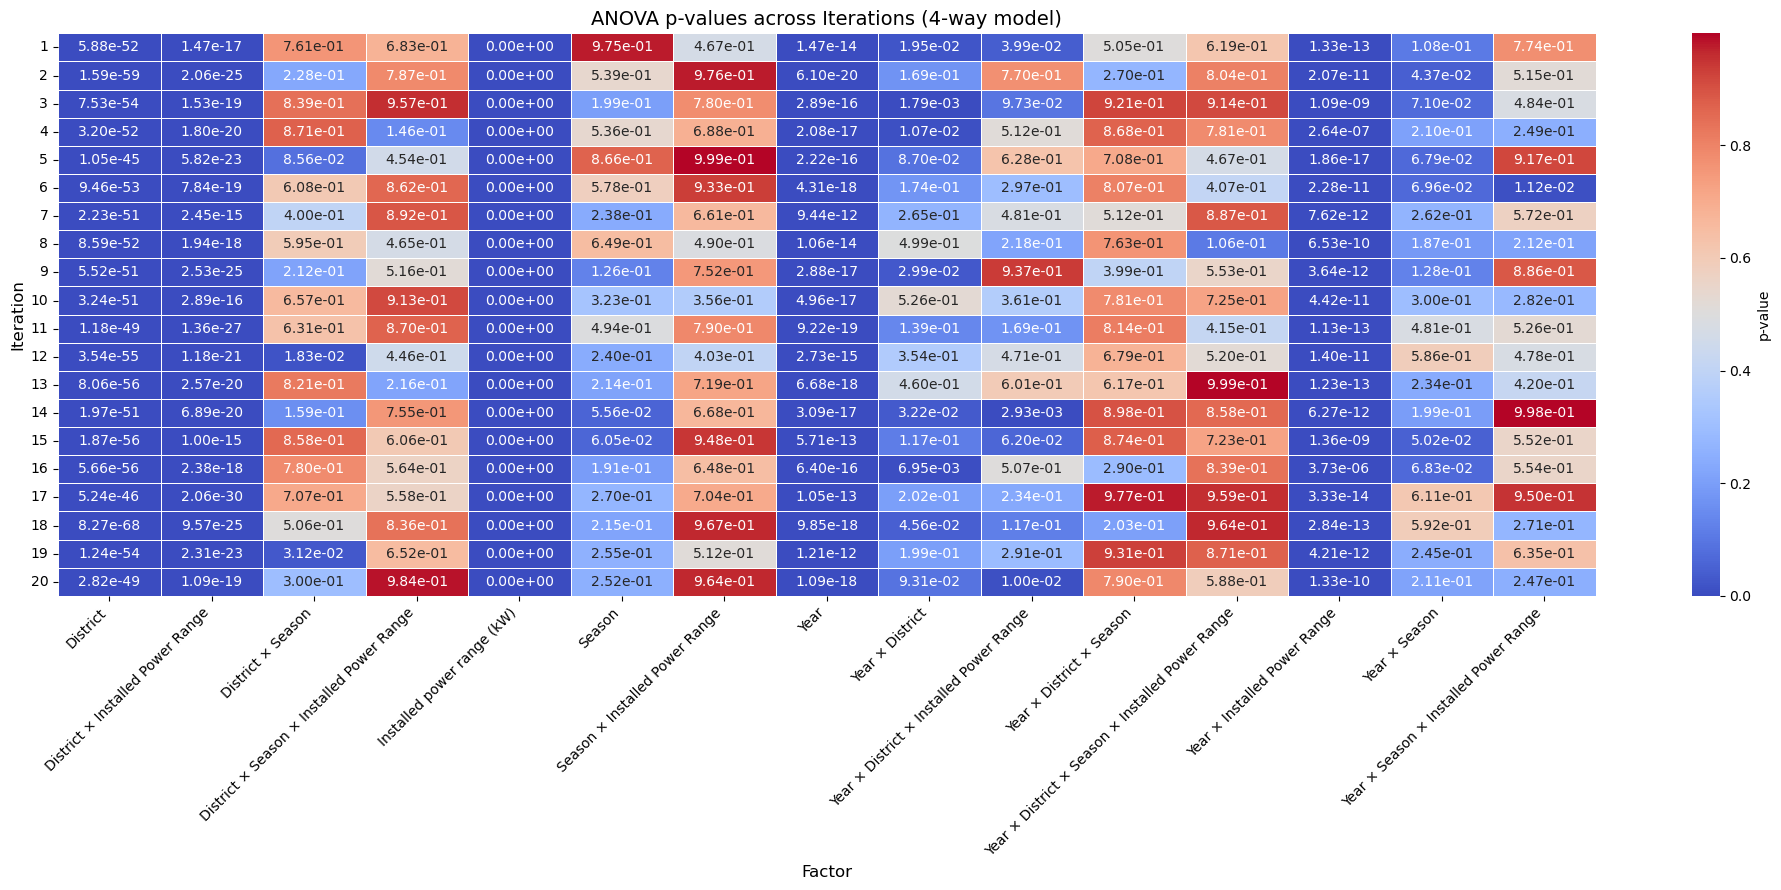

In [67]:
# --- Transform data to long format including Year, Season, District, InstalledPowerRange ---
df_pval_long = df_results.melt(
    id_vars=['Iteration'],
    value_vars=[
        'p_Year',
        'p_District',
        'p_Season',
        'p_InstalledPowerRange',
        'p_Year_District',
        'p_Year_Season',
        'p_District_Season',
        'p_Year_InstalledPowerRange',
        'p_District_InstalledPowerRange',
        'p_Season_InstalledPowerRange',
        'p_Year_District_Season',
        'p_Year_District_InstalledPowerRange',
        'p_Year_Season_InstalledPowerRange',
        'p_District_Season_InstalledPowerRange',
        'p_Year_District_Season_InstalledPowerRange'
    ],
    var_name='Factor',
    value_name='p_value'
)

# --- Rename factors for readability ---
df_pval_long['Factor'] = df_pval_long['Factor'].replace({
    'p_Year': 'Year',
    'p_District': 'District',
    'p_Season': 'Season',
    'p_InstalledPowerRange': 'Installed power range (kW)',

    'p_Year_District': 'Year × District',
    'p_Year_Season': 'Year × Season',
    'p_District_Season': 'District × Season',

    'p_Year_InstalledPowerRange': 'Year × Installed Power Range',
    'p_District_InstalledPowerRange': 'District × Installed Power Range',
    'p_Season_InstalledPowerRange': 'Season × Installed Power Range',

    'p_Year_District_Season': 'Year × District × Season',
    'p_Year_District_InstalledPowerRange': 'Year × District × Installed Power Range',
    'p_Year_Season_InstalledPowerRange': 'Year × Season × Installed Power Range',
    'p_District_Season_InstalledPowerRange': 'District × Season × Installed Power Range',

    'p_Year_District_Season_InstalledPowerRange': 'Year × District × Season × Installed Power Range'
})

# --- Pivot for heatmap ---
heatmap_data = df_pval_long.pivot(index='Iteration', columns='Factor', values='p_value')

# --- Plot ---
plt.figure(figsize=(20, 9))
sns.heatmap(
    heatmap_data,
    annot=True,         # change to True if you want numbers on cells
    fmt=".2e",
    cmap='coolwarm',   # blue = low p, red = high p
    cbar_kws={'label': 'p-value'},
    linewidths=0.5
)

plt.title("ANOVA p-values across Iterations (4-way model)", fontsize=14)
plt.ylabel("Iteration", fontsize=12)
plt.xlabel("Factor", fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<div id="results"></div>
<strong><a href="#top">Back to top</a></strong>

# Results and Discussion

<div id="conclusion"></div>
<strong><a href="#top">Back to top</a></strong>

# Conclusion

<strong><a href="#top">Back to top</a></strong>